Import dependencies

In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px

# Import and read the healthcare-dataset-stroke-data.csv.

stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data pre-processing


In [2]:
stroke_df.sample (10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3768,57044,Male,58.00,0,0,Yes,Private,Urban,88.05,30.6,Unknown,0
4401,14996,Male,66.00,0,0,Yes,Self-employed,Rural,85.98,28.0,Unknown,0
979,44281,Male,34.00,0,0,No,Private,Rural,89.68,23.2,smokes,0
4030,12990,Male,9.00,0,0,No,children,Rural,84.17,17.4,Unknown,0
529,7621,Female,31.00,0,0,Yes,Private,Rural,80.79,28.7,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
1953,30285,Male,72.00,0,1,Yes,Self-employed,Rural,74.36,27.3,never smoked,0
2780,44472,Male,32.00,0,0,Yes,Self-employed,Urban,160.64,20.4,smokes,0
1713,4099,Female,21.00,0,0,No,Private,Urban,78.35,20.3,Unknown,0
3984,7298,Female,56.00,0,0,Yes,Self-employed,Rural,70.23,35.5,never smoked,0


In [3]:
# Get a brief summary of the crowdfunding_info DataFrame.
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


DATA CLEANING

In [5]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#remove unnecessary columns
stroke_df.drop(['id'],axis=1,inplace = True)

In [7]:
#remove duplicates values
stroke_df.drop_duplicates(inplace=True)

In [8]:
#null data handled
stroke_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Determining outliers

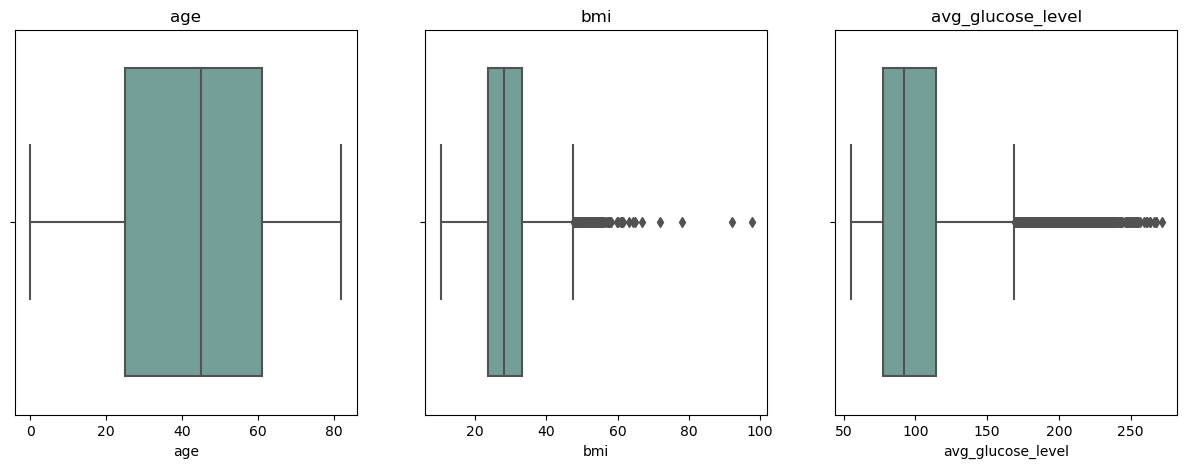

In [9]:
num_cols = ['age','bmi','avg_glucose_level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)
    
    sns.boxplot(x=stroke_df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [10]:
def detect_outliers(data,column):
    q1 = stroke_df[column].quantile(.25)
    q3= stroke_df[column].quantile(.75)
    IQR = q3-q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = stroke_df.index[(stroke_df[column] <lower_bound) | (stroke_df[column] > upper_bound)]
    
    return ls

In [11]:
index_list = []

for column in num_cols:
    index_list.extend(detect_outliers(stroke_df,column))

# remove duplicated indices in the index_list and sort it 
index_list = sorted(set(index_list))
before_remove = stroke_df.shape

stroke_df =stroke_df.drop(index_list)
after_remove = stroke_df.shape

print(f'''Shape of data before removing outliers : {before_remove}
Shape of data after remove : {after_remove}''')

Shape of data before removing outliers : (5110, 11)
Shape of data after remove : (4401, 11)


In [12]:
#before_remove = stroke_df.shape

#stroke_df =stroke_df.drop(index_list)
#after_remove = stroke_df.shape

#print(f'''Shape of data before removing outliers : {before_remove}
#Shape of data after remove : {after_remove}''')

DATA VISUALISATION

In [13]:
# Create a series of average BMI for each age
avg_bmi_by_age = stroke_df.groupby('age')['bmi'].mean()
avg_bmi_by_age

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.331507
79.00    27.916129
80.00    27.924000
81.00    27.597872
82.00    27.335897
Name: bmi, Length: 104, dtype: float64

In [14]:
# Replace NaN values in the "bmi" column with the average BMI of the corresponding age
def replace_bmi(row):
    if pd.isna(row['bmi']):
        return avg_bmi_by_age[row['age']]
    else:
        return row['bmi']

stroke_df['bmi'] = stroke_df.apply(replace_bmi, axis=1)

In [15]:
# Check the info of the dataframe (if the NaN values in the 'bmi' column are replaced)
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4401 entries, 2 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4401 non-null   object 
 1   age                4401 non-null   float64
 2   hypertension       4401 non-null   int64  
 3   heart_disease      4401 non-null   int64  
 4   ever_married       4401 non-null   object 
 5   work_type          4401 non-null   object 
 6   Residence_type     4401 non-null   object 
 7   avg_glucose_level  4401 non-null   float64
 8   bmi                4401 non-null   float64
 9   smoking_status     4401 non-null   object 
 10  stroke             4401 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 412.6+ KB


<Axes: ylabel='Count'>

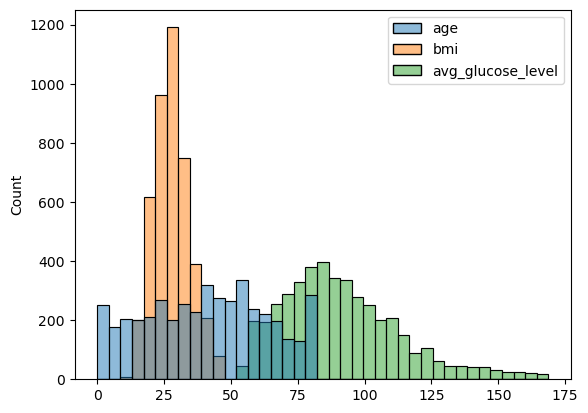

In [16]:
# Examine the distribution of 'age', 'bmi' and 'avg_glucose_level'
sns.histplot(stroke_df[['age', 'bmi', 'avg_glucose_level']])

Text(0.5, 0, 'BMI')

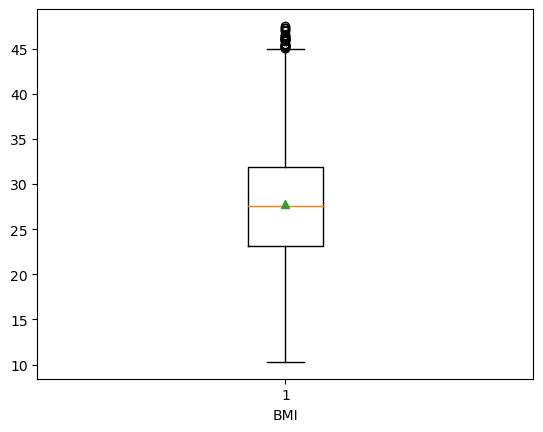

In [17]:
# Look at the distribution of bmi column in closer detail
plt.boxplot(stroke_df['bmi'], showmeans=True)
plt.xlabel('BMI')

In [18]:
# Create bins for the bmi column 
bins = [0, 18, 25, 30, 100]
labels = ['underweight', 'normal', 'overweight', 'obese']
stroke_df['binned_bmi'] = pd.cut(stroke_df['bmi'], bins = bins, labels = labels)

In [19]:
# Check if bins are created successfully 
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,binned_bmi
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,obese
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,overweight
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,normal
8,Female,59.0,0,0,Yes,Private,Rural,76.15,29.472414,Unknown,1,overweight
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,27.924000,never smoked,0,overweight
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,obese
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,obese
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,overweight


Binning algorithms can pre-process the data and speed up the subsequent tree construction in a random forest. It is a pre-processsing method to group numerical values and is a technique that may address prevalent data issues such as the handling of missing values, presence of outliers and statistical noise as well as data scaling. 

In [20]:
# Determine the number of unique values in each column.
stroke_df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3326
bmi                   405
smoking_status          4
stroke                  2
binned_bmi              4
dtype: int64

<Axes: >

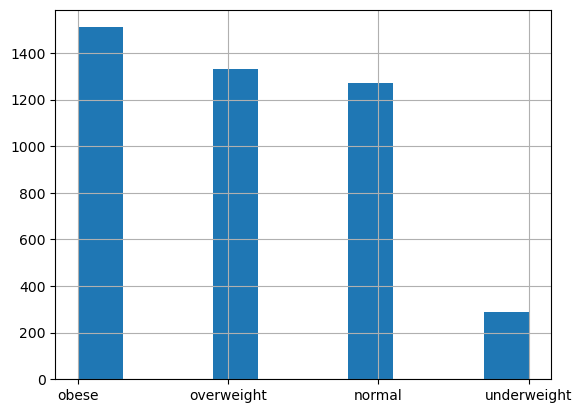

In [21]:
# Check the distribution of the bmi bins
stroke_df['binned_bmi'].hist()

In [22]:
# Look at gender value counts
gender_counts = stroke_df['gender'].value_counts()
gender_counts

Female    2599
Male      1801
Other        1
Name: gender, dtype: int64

In [23]:
# Drop the record with gender = 'Other' (since there is only 1 record)
stroke_df = stroke_df.drop(stroke_df[stroke_df['gender'] == 'Other'].index)

In [24]:
# Check if 'Other' is dropped on gender column
stroke_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
# Look at work type value counts
work_counts = stroke_df['work_type'].value_counts()
work_counts

Private          2488
children          675
Self-employed     662
Govt_job          553
Never_worked       22
Name: work_type, dtype: int64

In [26]:
# Look at smoking status value counts
smoke_counts = stroke_df['smoking_status'].value_counts()
smoke_counts

never smoked       1598
Unknown            1422
formerly smoked     708
smokes              672
Name: smoking_status, dtype: int64

In [27]:
# Look at the stroke outcome value counts
stroke_counts = stroke_df['stroke'].value_counts()
stroke_counts

0    4235
1     165
Name: stroke, dtype: int64

Findings: The 0s and 1s in stroke column is highly imbalanced

In [28]:
# Split the data into X and y
y = stroke_df['stroke']
X = stroke_df.drop(columns=['stroke'])

BUILD MACHINE LEARNING MODELS

In [29]:
# Dependencies
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN

In [30]:
# Perform oversampling with RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [31]:
# Convert categorical data to numeric with `pd.get_dummies` (only on X, bc y is already 0s and 1s)
X_encoded = pd.get_dummies(X_ros)

In [32]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_encoded)

In [33]:
# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_ros, test_size = 0.2, random_state=1)

TRAIN AND EVALUATE THE MODEL

In [34]:
# Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

In [35]:
# Instantiate a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=1)

In [36]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [37]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [39]:
# Make predictions on the test set
predictions_train = rf_model.predict(X_train)

In [40]:
# Evaluate the model with Confusion Matrix and accuracy score on the trainging data
traincm = confusion_matrix(y_train, predictions_train)
traincm_df = pd.DataFrame(
    traincm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_train, predictions_train)
display(traincm_df)

,Predicted 0,Predicted 1
Actual 0,3385,0
Actual 1,0,3391


In [41]:
# Make predictions on the testing set
predictions = rf_model.predict(X_test)

In [42]:
# Evaluate the model with Confusion Matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)

In [43]:
# Generate a confusion matrix for the model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,844,6
Actual 1,0,844


In [44]:
# Look at the accuracy score 
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9964580873671782


In [45]:
# Look at the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       850
           1       0.99      1.00      1.00       844

    accuracy                           1.00      1694
   macro avg       1.00      1.00      1.00      1694
weighted avg       1.00      1.00      1.00      1694



Evaluation: In this optimization attempt, we divided the bmi column into four categories(or bins) and applied the RandomOverSampler technique to oversample the data and utilized it for training our model. As a result, we obtained an accuracy score of approximately 99.6% for predicting both class 0 and 1. When we compared this outcome with our initial model that didn't involve binning the bmi, we observed that the overall performance increased slightly by 1.5%, while sensitivity and specificity scores were enhanced. This suggests that binning the bmi column has an affect on the overall performance of the model.